**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   Estudiante X: ZZZZZZ
*   MATRÍCULA del estudiante X: ZZZZZ
*   Estudiante 2: Alejandra Berenice Vega López
*   MATRÍCULA de la estudiante 2: A01795415
*   Estudiante 3: Israel Luján González
*   MATRÍCULA del estudiante 3: A01794693
*   Estudiante 4: Eduardo Selim Martínez Mayorga
*   MATRÍCULA del estudiante 4: A01795167

In [1]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [2]:
"""
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
os.chdir(DIR)
"""

'\nimport os\nDIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"\nos.chdir(DIR)\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [4]:
# El archivo "Cereals.csv" se encuentra en la misma
# carpeta que este Jupyter Notebook

cereals_df = pd.read_csv('Cereals.csv')

# Se verifica la lectura y definición del dataframe
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
# Observamos el número de renglones y columnas del dataframe
cereals_df.shape

(77, 16)

# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [7]:
# Guardamos la serie en un objeto
x = cereals_df.dtypes

# Convertimos la serie guardada en un dataframe
df_columnas = x.apply(pd.Series)

# Se convierte el índice en un columna y se toma a los índices
# como los números naturales
df_columnas.reset_index(inplace=True)

#Cambiamos el nombre de las columnas para mayor entendimiento
df_columnas.columns = ['variable', 'tipo']

# Ahora sí se puede contar cuántas columnas hay de cada tipo
df_columnas['tipo'].value_counts()

float64    7
int64      6
object     3
Name: tipo, dtype: int64

Esto significa que hay

+ 7 variables del tipo `float64` (i.e. que toman valores reales)
+ 6 variables del tipo `int64` (i.e. que toman valores enteros)
+ 3 variables del tipo `object` (i.e. que toman valores strings)

In [8]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [9]:
# Se obtienen conteos, número de valores únicos, moda y
# y su frecuencia para las variables no numéricas
cereals_df.describe(include = 'object')

,name,mfr,type
count,77,77,77
unique,77,7,2
top,Shredded_Wheat,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [10]:
df_columnas

,variable,tipo
0,name,object
1,mfr,object
2,type,object
3,calories,int64
4,protein,int64
5,fat,int64
6,sodium,int64
7,fiber,float64
8,carbo,float64
9,sugars,float64


In [11]:
# Se obtienen conteos, número de valores únicos, moda y
# y su frecuencia para las variables no numéricas
cereals_df['mfr'].describe(include = 'object')

count     77
unique     7
top        K
freq      23
Name: mfr, dtype: object

In [12]:
cereals_df['mfr'].value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [13]:
cereals_df['shelf'].value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

In [14]:
cereals_df['shelf'] = cereals_df['shelf'].astype(str)

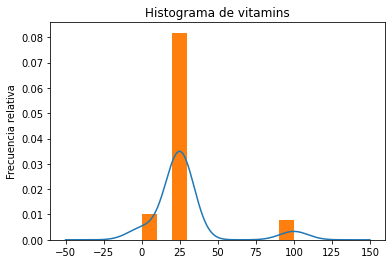

In [15]:
# Hacemos el histograma
fig, ax = plt.subplots()
cereals_df['vitamins'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de vitamins')
cereals_df['vitamins'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

In [16]:
cereals_df['vitamins'].value_counts()

25     63
0       8
100     6
Name: vitamins, dtype: int64

In [17]:
cereals_df['vitamins'] = cereals_df['vitamins'].astype(str)

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

In [18]:
pd.crosstab(cereals_df['shelf'],cereals_df['mfr'], margins=True, margins_name="Total")

mfr,A,G,K,N,P,Q,R,Total
shelf,,,,,,,,
1,0,6,4,3,2,1,4,20
2,1,7,7,2,1,3,0,21
3,0,9,12,1,6,4,4,36
Total,1,22,23,6,9,8,8,77


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

La regla de Sturges, propuesta por Herbert Sturges en 1926, es una regla práctica acerca del número de clases que deben considerar al elaborarse un histograma

In [19]:
# Se usará la regla de Sturges
num_intervalos = math.ceil(1 + np.log(len(cereals_df))/np.log(5))
num_intervalos

4

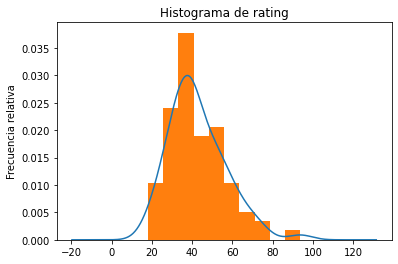

In [20]:
# Hacemos el histograma
fig, ax = plt.subplots()
cereals_df['rating'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de rating')
cereals_df['rating'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

In [21]:
conteo_clases = pd.cut(cereals_df['rating'],
                       bins=num_intervalos).value_counts()

conteo_clases

(36.958, 55.874]    36
(17.967, 36.958]    29
(55.874, 74.789]    11
(74.789, 93.705]     1
Name: rating, dtype: int64

In [22]:
# Intervalo (rango) con la mayor frecuencia
conteo_clases.index[0]

Interval(36.958, 55.874, closed='right')

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [23]:
cereals_df[['mfr', 'rating']]

,mfr,rating
0,N,68.402973
1,Q,33.983679
2,K,59.425505
3,K,93.704912
4,R,34.384843
...,...,...
72,G,39.106174
73,G,27.753301
74,R,49.787445
75,G,51.592193


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

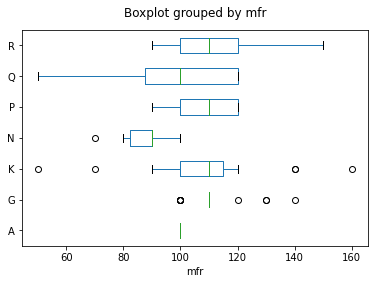

In [24]:
# Boxplots con respecto a las categorías de la variable
# 'Smorking'
graf = cereals_df.boxplot(by = 'mfr',
                           column = ['calories'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

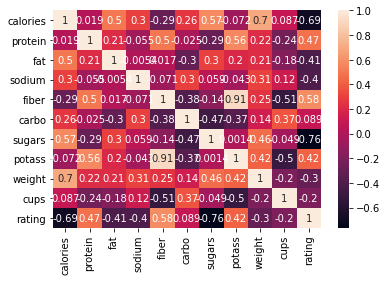

In [25]:
# Se construye el mapa de calor a partir de las correlaciones
# Pero se le agregan las leyendas de las correlaciones
# para mejor visualización
sns.heatmap(cereals_df.corr(), annot=True);

In [26]:
# Se obtiene la matriz de correlaciones
matriz_corr = cereals_df.corr()
matriz_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,0.419933,-0.501607,0.416009
weight,0.696091,0.216158,0.214625,0.308576,0.247226,0.138467,0.455844,0.419933,1.000000,-0.199583,-0.298124
cups,0.087200,-0.244469,-0.175892,0.119665,-0.513061,0.367460,-0.048961,-0.501607,-0.199583,1.000000,-0.203160


In [27]:
# Se obtienen las correlaciones con 'loan_status' y se
# ordenan descendentemente
matriz_corr['rating'].sort_values(ascending = False)

rating      1.000000
fiber       0.584160
protein     0.470618
potass      0.416009
carbo       0.088712
cups       -0.203160
weight     -0.298124
sodium     -0.401295
fat        -0.409284
calories   -0.689376
sugars     -0.763902
Name: rating, dtype: float64

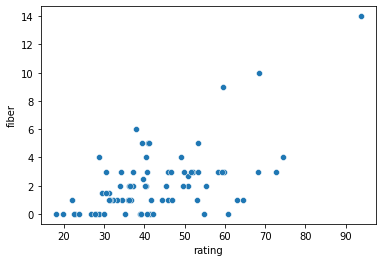

In [28]:
sns.scatterplot(x = "rating", y = "fiber", data = cereals_df);

<AxesSubplot:xlabel='rating', ylabel='protein'>

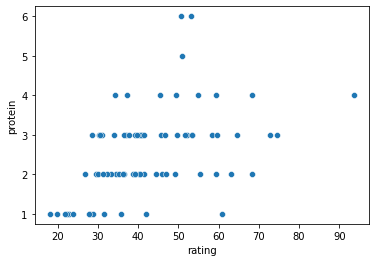

In [29]:
sns.scatterplot(x = "rating",
                    y = "protein",
                    data = cereals_df)

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [30]:
cereals_df = cereals_df.dropna(how = 'any')
cereals_df = cereals_df.reset_index(drop=True)

In [31]:
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [32]:
# Guardamos la serie en un objeto
x = cereals_df.dtypes

# Convertimos la serie guardada en un dataframe
df_columnas = x.apply(pd.Series)

# Se convierte el índice en un columna y se toma a los índices
# como los números naturales
df_columnas.reset_index(inplace=True)

#Cambiamos el nombre de las columnas para mayor entendimiento
df_columnas.columns = ['variable', 'tipo']

lista_numericas = df_columnas[df_columnas['tipo'] != 'object']['variable']
lista_numericas = lista_numericas.tolist()
lista_numericas

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'weight',
 'cups',
 'rating']

In [33]:
lista_numericas.remove("rating")

In [34]:
lista_explicativas = lista_numericas
lista_explicativas

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'weight',
 'cups']

In [35]:
lista_categoricas = df_columnas[df_columnas['tipo'] == 'object']['variable']
lista_categoricas = lista_categoricas.tolist()
lista_categoricas

['name', 'mfr', 'type', 'vitamins', 'shelf']

In [36]:
X = cereals_df[lista_explicativas]
y = cereals_df['rating']

In [37]:
X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,1.0,0.50
4,110,2,2,180,1.5,10.5,10.0,70.0,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...
69,110,2,1,250,0.0,21.0,3.0,60.0,1.0,0.75
70,110,1,1,140,0.0,13.0,12.0,25.0,1.0,1.00
71,100,3,1,230,3.0,17.0,3.0,115.0,1.0,0.67
72,100,3,1,200,3.0,17.0,3.0,110.0,1.0,1.00


In [38]:
y

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     29.509541
        ...    
69    39.106174
70    27.753301
71    49.787445
72    51.592193
73    36.187559
Name: rating, Length: 74, dtype: float64

In [39]:
sc = StandardScaler()
X_esc = sc.fit_transform(X)

pca = PCA(n_components = len(X.columns))
 
X_pca = pca.fit_transform(X_esc)

variables_proyectadas = pd.DataFrame(X_pca)

varianza_explicada = pca.explained_variance_ratio_

varianza_explicada

array([0.30797524, 0.24958721, 0.16518502, 0.09442929, 0.06743118,
       0.06259086, 0.03582656, 0.00936177, 0.00578247, 0.00183039])

In [40]:
variables_proyectadas

,0,1,2,3,4,5,6,7,8,9
0,4.957176,2.687495,-0.738944,-0.763077,-0.805876,-0.199331,0.069590,0.010789,0.256653,0.024920
1,1.455346,-1.021596,-2.439536,3.491834,-0.386668,-0.703450,-1.234160,-0.581422,0.031777,-0.102268
2,4.805993,2.265399,0.345146,-1.137000,-1.897325,-0.020438,0.015882,0.119841,-0.491732,-0.029560
3,5.353223,4.424630,0.918565,-1.413447,-0.633642,-0.980144,-1.003039,0.050854,0.724192,0.102261
4,0.085789,-0.633744,-1.400987,0.218146,-0.866060,0.289175,0.037076,-0.187569,0.168728,-0.051198
...,...,...,...,...,...,...,...,...,...,...
69,-1.431514,-0.236884,1.434967,0.089177,-0.425254,1.265399,-0.289585,0.070671,-0.349039,0.087073
70,-1.636542,-0.736675,-1.588127,-0.461528,0.012106,-0.312049,-0.163082,-0.098426,0.098205,0.097037
71,0.377306,0.596820,1.223127,0.076423,-0.616167,0.706485,0.000077,0.053575,-0.034480,0.075843
72,-0.184907,0.592239,1.207516,0.421699,-0.375007,-0.512588,-0.344849,-0.056831,0.079459,0.043619


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

In [41]:
nivel_requerido = 0.9

varianza_acumulada = np.cumsum(varianza_explicada)
varianza_acumulada

array([0.30797524, 0.55756245, 0.72274747, 0.81717676, 0.88460794,
       0.9471988 , 0.98302536, 0.99238714, 0.99816961, 1.        ])

In [42]:
condicion = varianza_acumulada >= nivel_requerido
indice_cp = next((i for i, j in enumerate(condicion) if j), None)
num_cp = indice_cp + 1
num_cp

6

In [43]:
variables_pca = variables_proyectadas.loc[:,:indice_cp]
variables_pca.columns = [f"{'componente'}_{j}" for j in range(1,num_cp+1)]
variables_pca

,componente_1,componente_2,componente_3,componente_4,componente_5,componente_6
0,4.957176,2.687495,-0.738944,-0.763077,-0.805876,-0.199331
1,1.455346,-1.021596,-2.439536,3.491834,-0.386668,-0.703450
2,4.805993,2.265399,0.345146,-1.137000,-1.897325,-0.020438
3,5.353223,4.424630,0.918565,-1.413447,-0.633642,-0.980144
4,0.085789,-0.633744,-1.400987,0.218146,-0.866060,0.289175
...,...,...,...,...,...,...
69,-1.431514,-0.236884,1.434967,0.089177,-0.425254,1.265399
70,-1.636542,-0.736675,-1.588127,-0.461528,0.012106,-0.312049
71,0.377306,0.596820,1.223127,0.076423,-0.616167,0.706485
72,-0.184907,0.592239,1.207516,0.421699,-0.375007,-0.512588


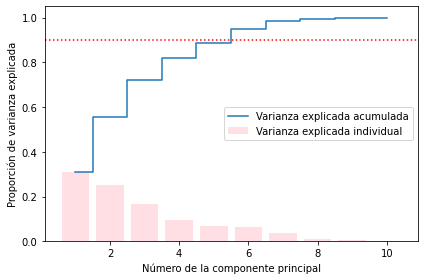

In [44]:
plt.bar(range(1,len(varianza_explicada)+1),
        varianza_explicada, alpha = 0.5, align = 'center', 
        label='Varianza explicada individual', color = "pink")
plt.step(range(1,len(varianza_acumulada)+1), varianza_acumulada, 
         where = 'mid', label = 'Varianza explicada acumulada')
# Se agrega una línea horizontal
plt.axhline(y = nivel_requerido, color = 'r', linestyle = ':')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Número de la componente principal')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [45]:
componentes_principales=pd.DataFrame(pca.components_[:num_cp],
                                     columns = lista_explicativas)

componentes_principales

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups
0,0.007152,0.358470,0.196112,-0.052141,0.496667,-0.287875,0.067854,0.531933,0.253986,-0.385556
1,-0.603974,0.054872,-0.315332,-0.265143,0.195921,-0.099984,-0.438077,0.051275,-0.463405,-0.069311
2,0.066367,0.352978,-0.213340,0.413920,0.123184,0.596398,-0.459743,0.116050,0.219251,0.101934
3,0.163611,0.445650,0.659815,-0.321206,-0.190003,0.064132,-0.308863,-0.087025,-0.261030,0.157411
4,0.187545,0.040019,-0.336061,-0.799248,-0.024629,0.313426,0.048646,0.019825,0.329660,-0.034832
5,0.061589,-0.231488,0.151529,0.036724,-0.167615,0.222739,-0.221520,-0.202805,-0.034294,-0.865578


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [46]:
primer_componente = pd.DataFrame(abs(pca.components_[:1]),
                                 columns = lista_explicativas)

indices_ordenados = primer_componente.loc[0].sort_values(ascending = False).index

In [47]:
componentes_principales[indices_ordenados].iloc[:, :3].head(1)

,potass,fiber,cups
0,0.531933,0.496667,-0.385556


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

In [48]:
cereals_df[lista_categoricas].describe(include = 'object')

,name,mfr,type,vitamins,shelf
count,74,74,74,74,74
unique,74,7,2,3,3
top,Nutri-Grain_Almond-Raisin,K,C,25,3
freq,1,23,73,62,35


Se puede ver que hay 74 registros y cada uno tiene un registro diferente. Por tanto, la variable `name` no se considera como explicativa/predictora.

In [49]:
lista_categoricas.remove("name")

In [50]:
explicativas_categ = lista_categoricas
explicativas_categ

['mfr', 'type', 'vitamins', 'shelf']

In [51]:
['rating'] + explicativas_categ

['rating', 'mfr', 'type', 'vitamins', 'shelf']

In [52]:
df_analisis_categ = cereals_df[['rating'] + explicativas_categ]
df_analisis_categ

,rating,mfr,type,vitamins,shelf
0,68.402973,N,C,25,3
1,33.983679,Q,C,0,3
2,59.425505,K,C,25,3
3,93.704912,K,C,25,3
4,29.509541,G,C,25,1
...,...,...,...,...,...
69,39.106174,G,C,25,3
70,27.753301,G,C,25,2
71,49.787445,R,C,25,1
72,51.592193,G,C,25,1


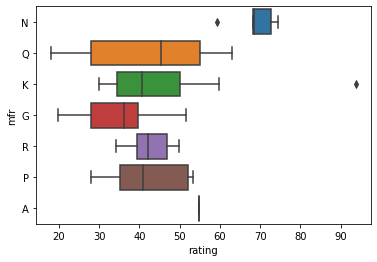

In [53]:
# Boxplots con respecto a las categorías de la variable 'mfr'
sns.boxplot(y = 'mfr', x = 'rating', data = df_analisis_categ);

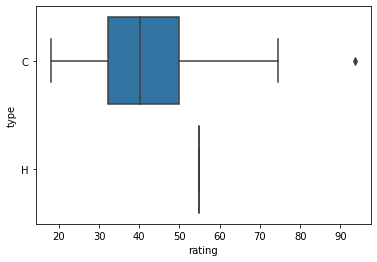

In [54]:
# Boxplots con respecto a las categorías de la variable 'type'
sns.boxplot(y = 'type', x = 'rating', data = df_analisis_categ);

In [55]:
cereals_df['type'].value_counts()

C    73
H     1
Name: type, dtype: int64

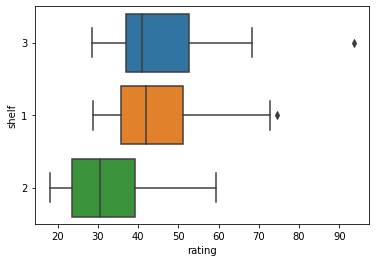

In [56]:
# Boxplots con respecto a las categorías de la variable 'type'
sns.boxplot(y = 'shelf', x = 'rating', data = df_analisis_categ);

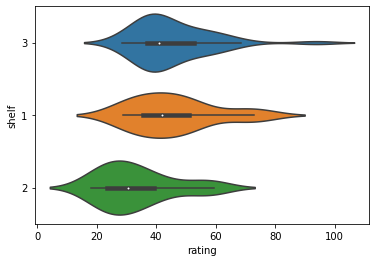

In [57]:
# Boxplots con respecto a las categorías de la variable 'type'
sns.violinplot(y = 'shelf', x = 'rating', data = df_analisis_categ);

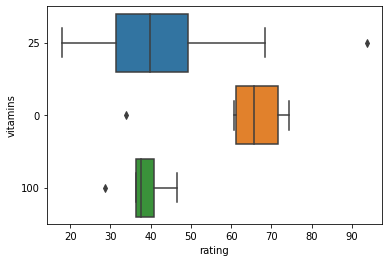

In [58]:
# Boxplots con respecto a las categorías de la variable 'vitamins'
sns.boxplot(y = 'vitamins', x = 'rating', data = df_analisis_categ);

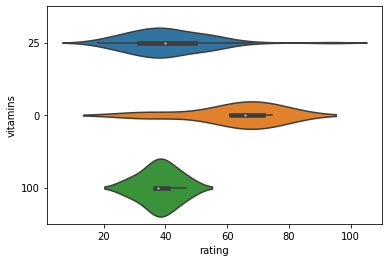

In [59]:
# Boxplots con respecto a las categorías de la variable 'vitamins'
sns.violinplot(y = 'vitamins', x = 'rating', data = df_analisis_categ);

In [60]:
explicativas_categ = ['shelf', 'mfr', 'vitamins']

In [61]:
cat_cols_encoded = []
for col in explicativas_categ:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(cereals_df[col].unique())]

encoder = OneHotEncoder(sparse=False)
cols_onehot = encoder.fit_transform(cereals_df[explicativas_categ])
df_enc = pd.DataFrame(cols_onehot, columns = cat_cols_encoded)

In [62]:
# Se le da un vistazo al dataframe
df_enc.head()

,s_3,s_1,s_2,m_N,m_Q,m_K,m_G,m_R,m_P,m_A,v_25,v_0,v_100
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [63]:
# Se concatenan los dataframe
df_final = pd.concat([cereals_df['rating'], variables_pca, df_enc],
          axis=1)

In [64]:
df_final

,rating,componente_1,componente_2,componente_3,componente_4,componente_5,componente_6,s_3,s_1,s_2,m_N,m_Q,m_K,m_G,m_R,m_P,m_A,v_25,v_0,v_100
0,68.402973,4.957176,2.687495,-0.738944,-0.763077,-0.805876,-0.199331,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.983679,1.455346,-1.021596,-2.439536,3.491834,-0.386668,-0.703450,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,59.425505,4.805993,2.265399,0.345146,-1.137000,-1.897325,-0.020438,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,93.704912,5.353223,4.424630,0.918565,-1.413447,-0.633642,-0.980144,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,29.509541,0.085789,-0.633744,-1.400987,0.218146,-0.866060,0.289175,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,39.106174,-1.431514,-0.236884,1.434967,0.089177,-0.425254,1.265399,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,27.753301,-1.636542,-0.736675,-1.588127,-0.461528,0.012106,-0.312049,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71,49.787445,0.377306,0.596820,1.223127,0.076423,-0.616167,0.706485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
72,51.592193,-0.184907,0.592239,1.207516,0.421699,-0.375007,-0.512588,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
